In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# İstenenler

1. Benzerliği yüksek veriler, modelin anlamlılığında fazladan etki edebileceği 
için, veri içindeki değişkenlerden benzerliği yüksek verilerin gruplanması veya kullanılacak verinin seçilmesi.  

>>>Bu maddede korelasyon coef katsayıları üzerinden ilerleyebiliriz. Benzerliği yüksek verilerin tek bir değişken haline getirilip getirilemeyeceğini değerlendirebilir. Eğer tek bir değişken haline getiremiyorsak benzer verilerden hangisini seçmemiz gerektiği üzerinde bir konuşabiliriz.

2. Veri setimizde anlamlı olabilecek yeni kolonlar oluşturulması.
>>> Bu madde için, birbirleriyle sayısal veya anlamsal ilişkisi olan değişkenlerden matematiksel hesaplamalar veya gruplandırmalar yaparak veri setimizi büyütebiliriz.


In [2]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Önce "Id" kolonundan kurtulduk.
df.drop("Id", axis=1, inplace=True)

In [4]:
# Bu data üzerinden işlem yapalım ana datamızı bozmayalım.
data = df.copy()

In [5]:
# Eksik verilere bakıp, belirli bir % değerine göre bazı kolonları drop etmeliyiz.

total = df.isnull().sum().sort_values(ascending=False)

missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns = ["Number of missing values"])
missing["% missing"] = (missing/len(df))*100 # % olarak

miss_values = missing[missing["Number of missing values"] >0]
print(f"How many columns have missing values ?: {len(miss_values)}\n")
print(miss_values)


How many columns have missing values ?: 19

              Number of missing values  % missing
PoolQC                            1453  99.520548
MiscFeature                       1406  96.301370
Alley                             1369  93.767123
Fence                             1179  80.753425
FireplaceQu                        690  47.260274
LotFrontage                        259  17.739726
GarageYrBlt                         81   5.547945
GarageCond                          81   5.547945
GarageType                          81   5.547945
GarageFinish                        81   5.547945
GarageQual                          81   5.547945
BsmtExposure                        38   2.602740
BsmtFinType2                        38   2.602740
BsmtCond                            37   2.534247
BsmtQual                            37   2.534247
BsmtFinType1                        37   2.534247
MasVnrArea                           8   0.547945
MasVnrType                           8   0.547945
Electr

In [6]:
# 19 Adet kolonumuzun sahip oldukları "eksik verilere" göre oluşturduğumuz DF üzerinden %45 ve üzeri oranda "eksik değere" sahip olan kolonları atalım.

data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1, inplace=True)


In [7]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000




---


**Şu ana kadar "eksik veriler" üzerinden oranlama yaparak bazı kolonlarımızı drop ettik. Şimdi sayısal veriler üzerinde durup, korelasyon ilişkilerine göre yüksek ilişki gösteren kolonlar arasından bir tanesini seçebiliriz.**


---



In [8]:
drop_columns_num = ["BsmtFinSF2","BsmtUnfSF", "LowQualFinSF",
                    "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "OpenPorchSF","EnclosedPorch","3SsnPorch", "ScreenPorch", "PoolArea","MiscVal"]

drop_columns_cat = ["GarageQual", "GarageCond","MSZoning","Street","LandContour","Utilities", "LotConfig","Condition1", "Condition2", "BldgType", "OverallCond", "RoofStyle", "RoofMatl",
                    "Exterior1st", "ExterCond", "BsmtCond", "BsmtFinType2", "Heating", "Functional", "PavedDrive"]

In [9]:
data.drop(drop_columns_num,axis=1,inplace=True)

In [10]:
data.drop(drop_columns_cat,axis=1,inplace=True)

---

**Eklenen Kolonlar**  

In [11]:
data["Age"] = data["YrSold"] - data["YearBuilt"]

In [12]:
# Yapı yapıları kaç yıl oldu
data["RemodAge"] = df["YrSold"] - data["YearRemodAdd"]

In [13]:
data["DateSold"] = pd.to_datetime(data['YrSold'].astype(str)  + data['MoSold'].astype(str), format='%Y%m')

In [14]:
data['TotalBath'] = data.apply(lambda x : x['BsmtFullBath']+x['FullBath'], axis=1)
data.drop(['FullBath',"BsmtFullBath"], inplace=True, axis=1)

<AxesSubplot:>

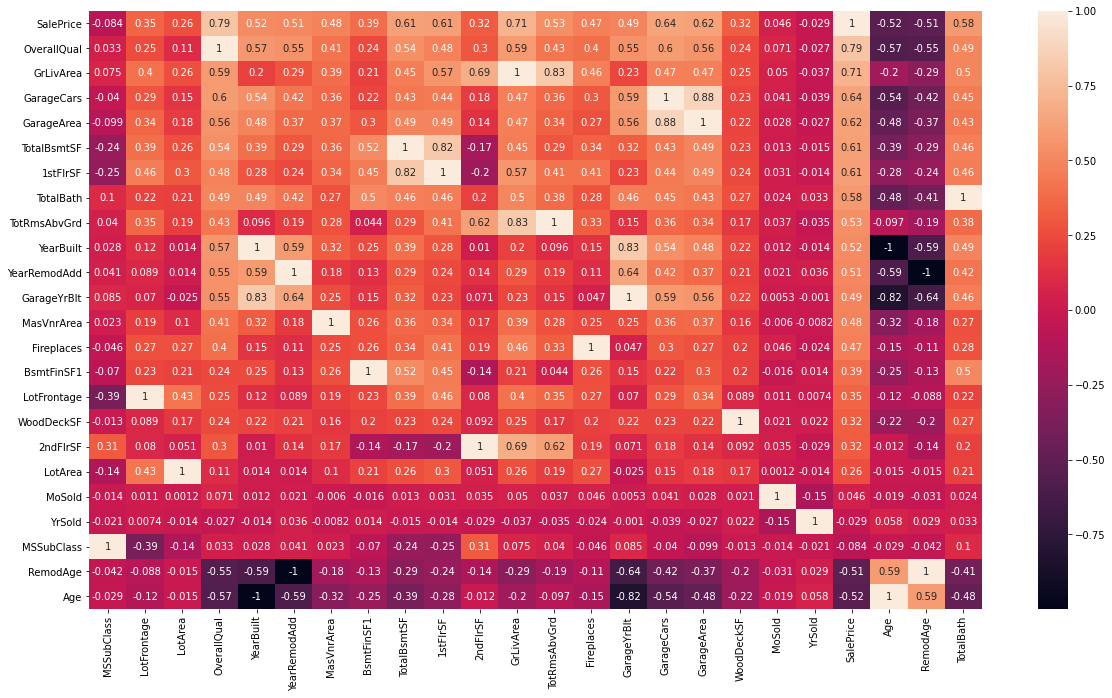

In [15]:
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(data.corr().sort_values(by="SalePrice",ascending=False),annot = True)

---  

**Heatmap korelasyon sonuçlarına göre;**  

*   Garage Cars ile Garage Area arasında 0.88 oranında bir pozitif ilişki var.

*   TotalBsmtSF ile 1stFlrSF arasında 0.82 oranında bir pozitif ilişki var.

*   TotRmsAbvGrd ile GrLivArea arasında 0.83 oranında bir pozitif ilişki var.

*   GarageYrBlt ile YearBuilt arasında 0.83 oranında bir pozitif ilişki var.



In [16]:
data.drop("BsmtFinSF1",axis=1,inplace=True)

In [17]:
data.drop("GarageArea",axis=1,inplace=True)

In [18]:
data.drop("TotRmsAbvGrd",axis=1,inplace=True)

In [19]:
data.drop("GarageYrBlt",axis=1,inplace=True)

In [20]:
data.drop("1stFlrSF",axis=1,inplace=True)

----

**Değiştirilen Kolonlar**

In [21]:
data.drop("MoSold",axis=1,inplace=True)

In [22]:
data.drop("YrSold",axis=1,inplace=True)

In [23]:
data.drop("YearRemodAdd",axis=1,inplace=True)

***Kategorik Atılanlar***

In [24]:
data.drop("SaleType",axis=1,inplace=True)

In [25]:
data.drop("SaleCondition",axis=1,inplace=True)

In [26]:
data.drop("Exterior2nd",axis=1,inplace=True)

In [27]:
data.drop("LandSlope",axis=1,inplace=True)

In [28]:
data.drop("HouseStyle",axis=1,inplace=True)

In [29]:
data.drop("MSSubClass",axis=1,inplace=True)

---

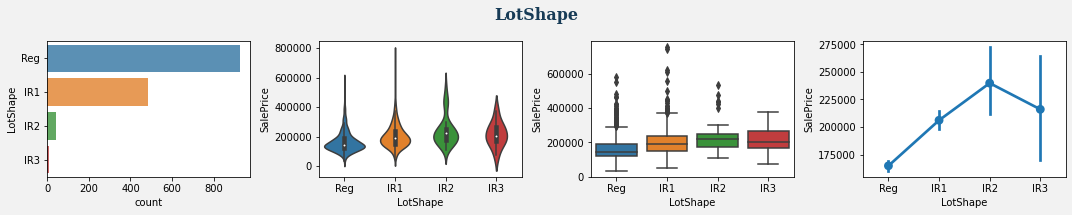

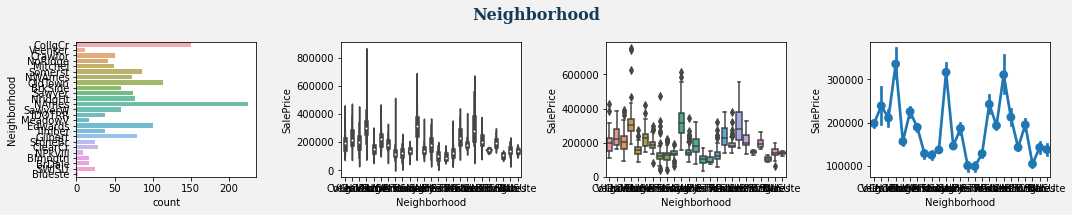

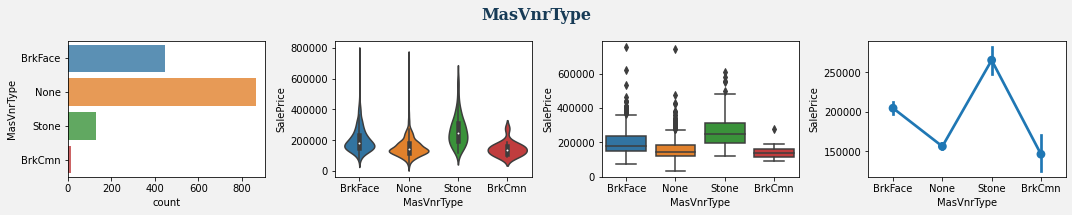

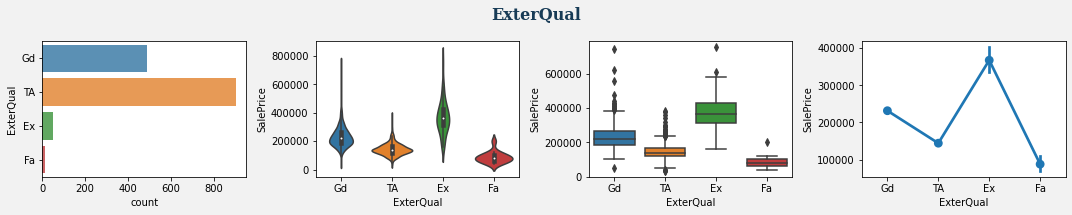

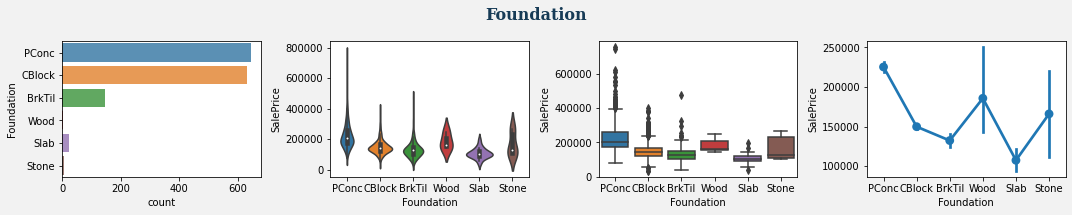

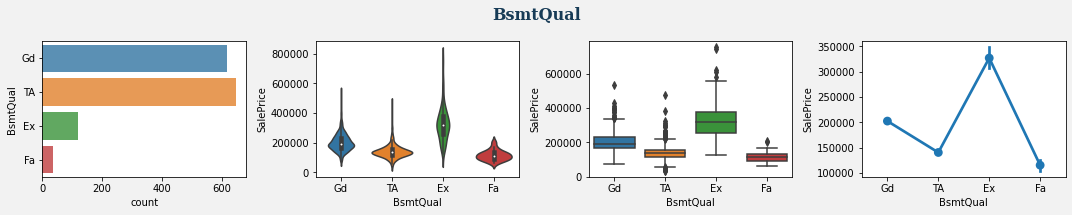

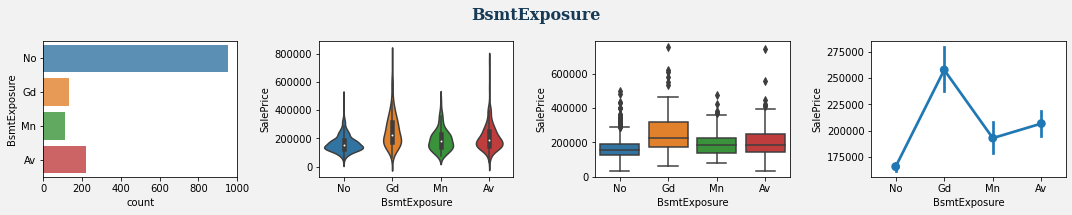

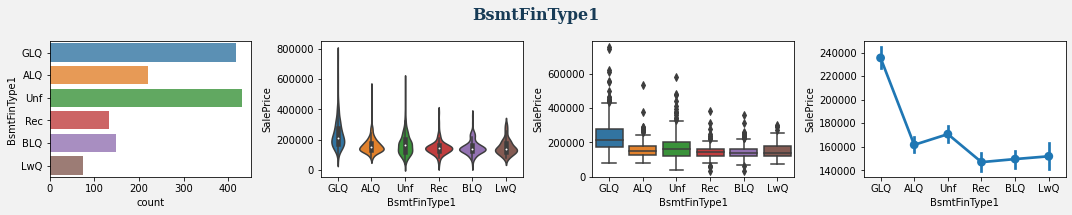

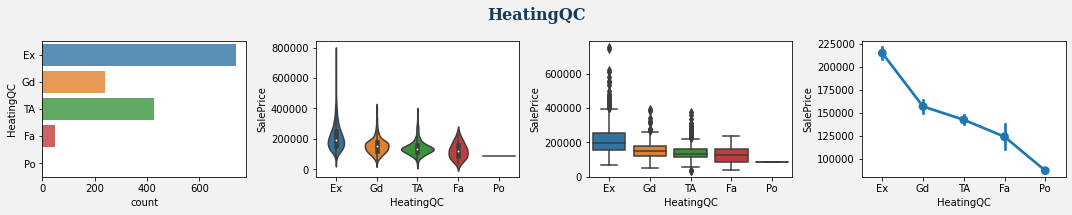

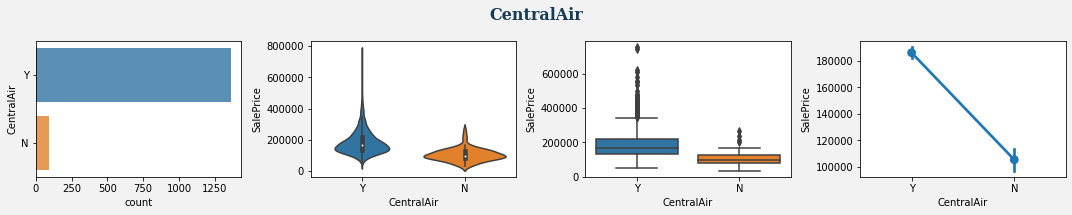

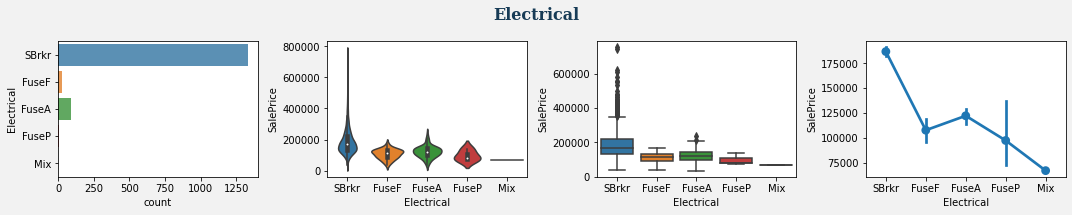

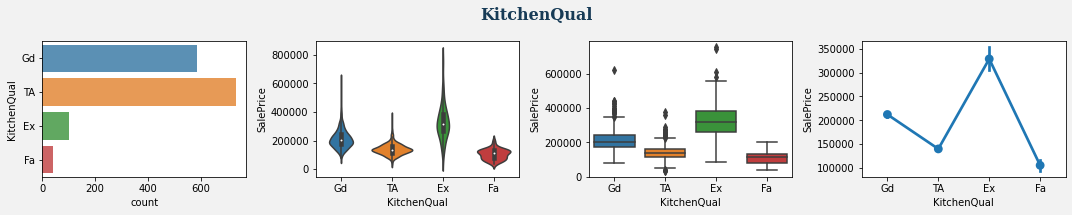

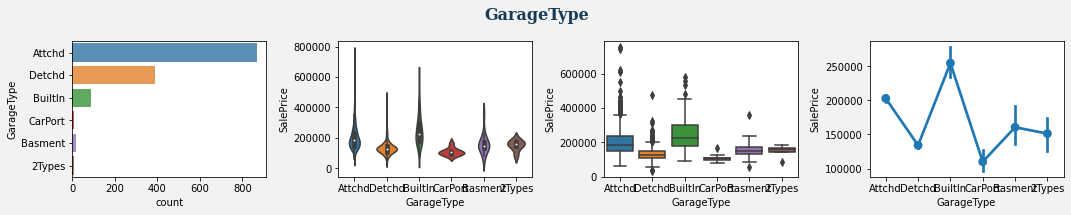

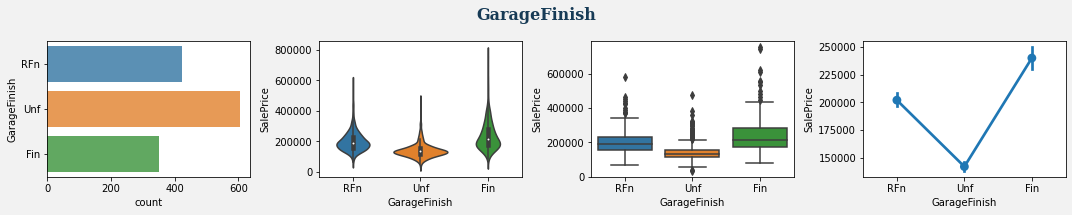

In [30]:
cat_cols = data.select_dtypes(include='object').columns.tolist()

for feature in cat_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(y=feature, data=data, alpha=0.8, ax=ax[0])
    sns.violinplot(y='SalePrice', x=feature, data=data, ax=ax[1])
    sns.boxplot(y='SalePrice', x=feature, data=data, ax=ax[2])
    sns.pointplot(y='SalePrice', x=feature, data=data, ax=ax[3])

    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()

**Düzenlenen Kategorikler**

In [31]:
data['LotShape'] = data['LotShape'].apply(lambda x: 'Regular' if x=='Reg' else 'Irregular')

In [32]:
def groupNeighborhood(i):
    if i<150_000:
        return 'CheapNeighborhood'
    elif i< 200_000:
        return 'MiddleNeighborhood'
    else:
        return 'ExpensiveNeighborhood'
df_groups = data.groupby('Neighborhood')['SalePrice'].mean().apply(groupNeighborhood)
data['Neighborhood'] = data['Neighborhood'].apply(lambda x: df_groups[x])

In [33]:
def groupFoundation(i):
    if i=='Wood' or i=='PConc' or i=='Stone':
        return 'ExpensiveFoundation'
    else:
        return 'CheapFoundation'
data['Foundation'] = data['Foundation'].apply(groupFoundation)

In [34]:
data['BsmtExposure'] = data['BsmtExposure'].apply(lambda x: 'No' if x=='No' else 'Yes')

In [35]:
data['BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x: 'GLQ' if x =='GLQ' else 'Other')

In [36]:
data['Electrical'] = data['Electrical'].apply(lambda x: 'SBrkr' if x =='SBrkr' else 'Other')

In [37]:
def groupGarage(i):
    if i=='Attchd' or i=='BuiltIn':
        return 'ExpensiveGarage'
    else:
        return 'CheapGarage'
data['GarageType'] = data['GarageType'].apply(groupGarage)

In [38]:
data['MasVnrType'] = data['MasVnrType'].apply(lambda x: 'None' if x =='BrkCmn' else x)
data['MasVnrType'].fillna('None',inplace=True) # 8 tane eksik veri none grubuna aktarıldı.

In [39]:
data['BsmtQual'] = data['BsmtQual'].apply(lambda x: 'TA' if x =='Fa' else x)
data['BsmtQual'].fillna('TA',inplace=True)
# Ortalaması 105,000 olduğu için ve TA'ya çok yakın olduğu için eksik veriler TA ile dolduruldu.

In [40]:
data['HeatingQC'] = data['HeatingQC'].apply(lambda x: 'Ex' if x =='Ex' else 'Others')

In [41]:
data['GarageFinish'].fillna('NoGarage',inplace=True)

---

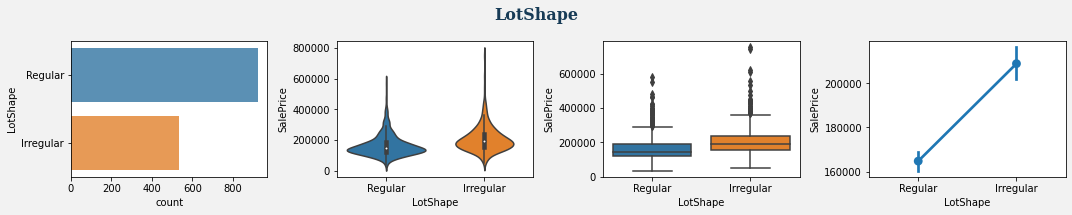

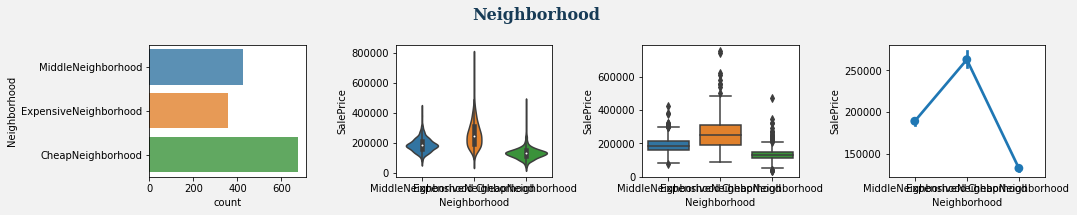

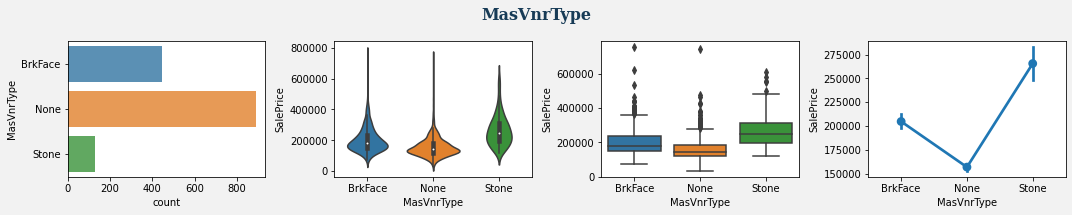

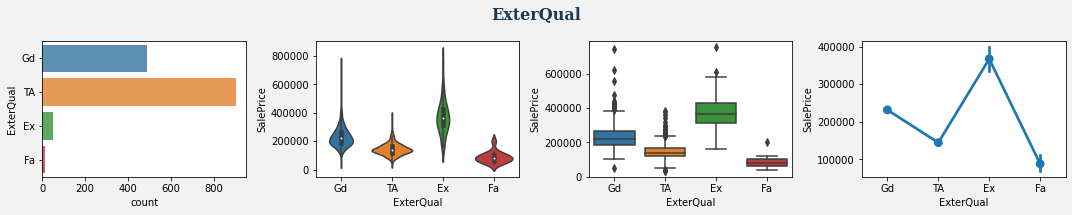

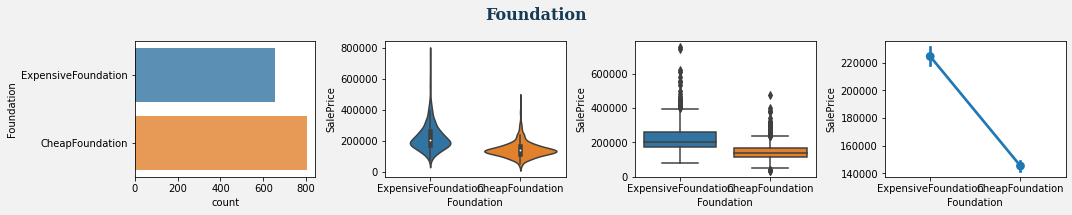

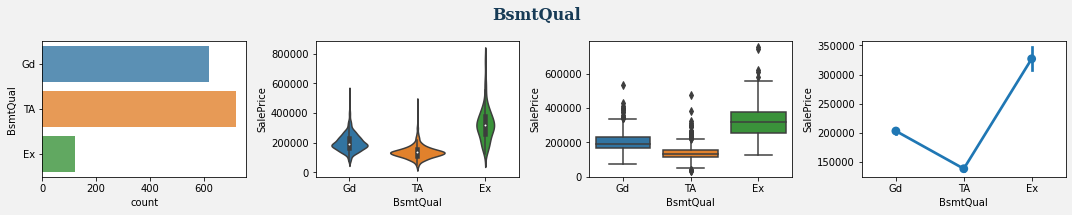

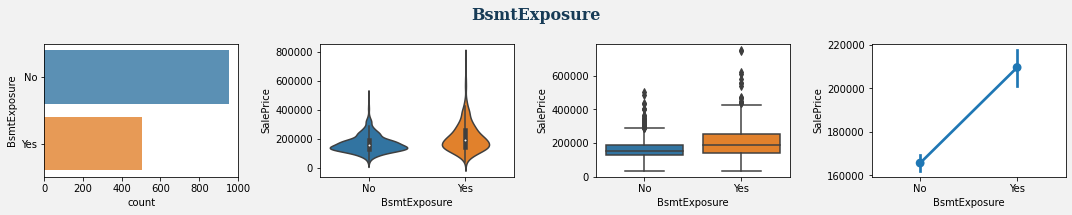

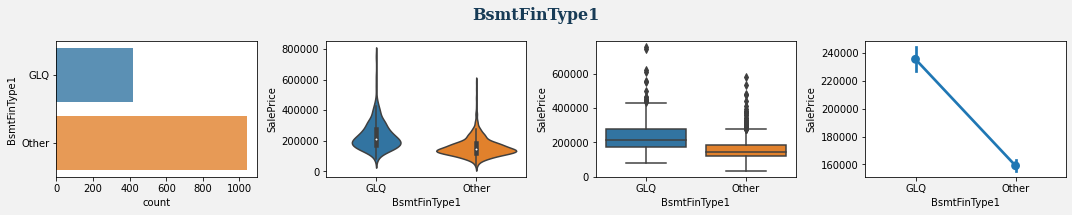

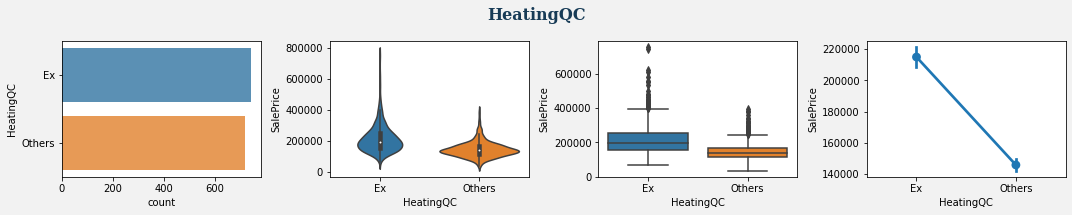

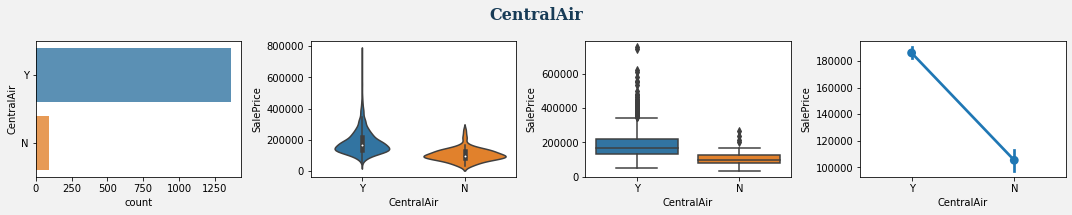

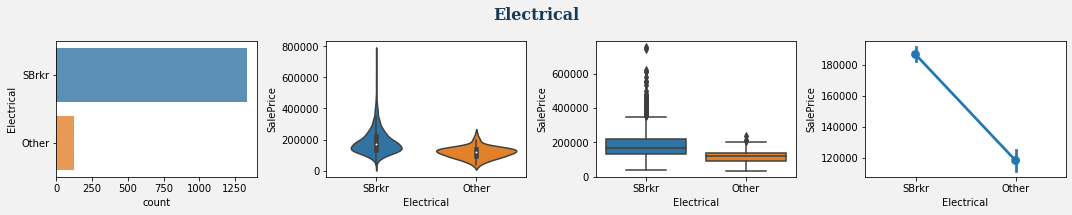

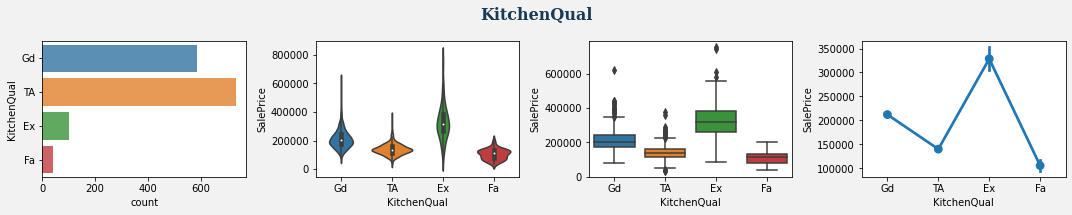

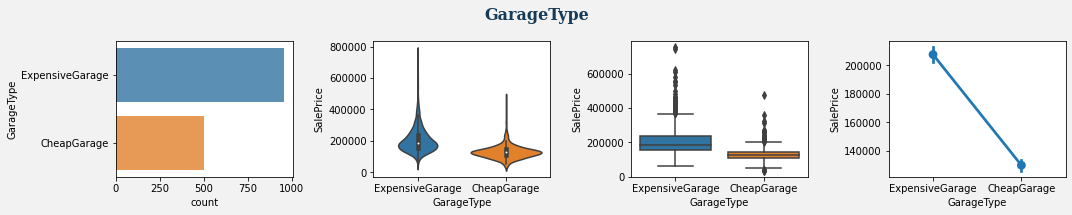

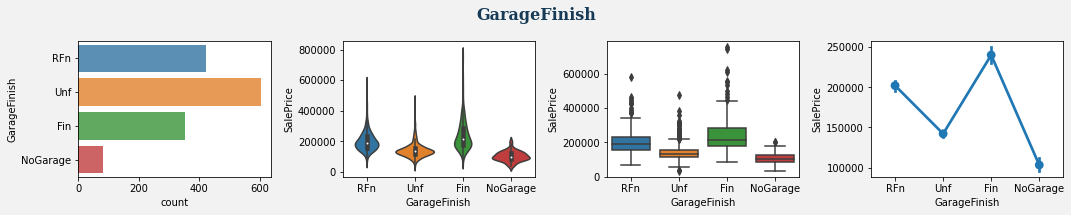

In [42]:
cat_cols = data.select_dtypes(include='object').columns.tolist()

for feature in cat_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(y=feature, data=data, alpha=0.8, ax=ax[0])
    sns.violinplot(y='SalePrice', x=feature, data=data, ax=ax[1])
    sns.boxplot(y='SalePrice', x=feature, data=data, ax=ax[2])
    sns.pointplot(y='SalePrice', x=feature, data=data, ax=ax[3])

    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()

<AxesSubplot:>

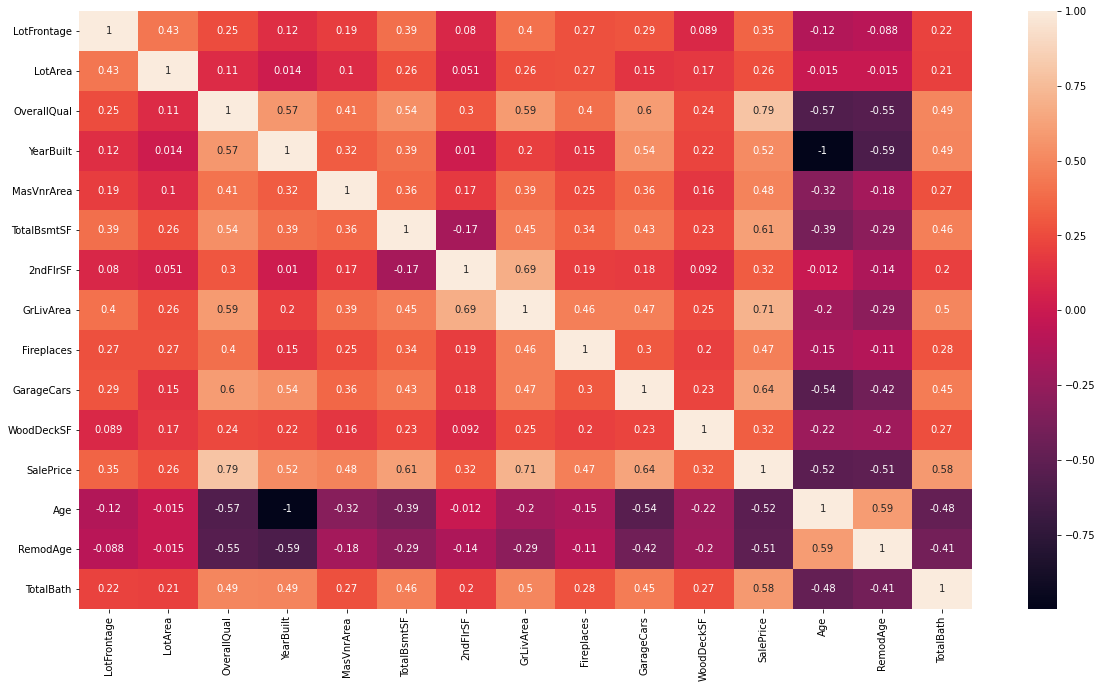

In [43]:
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(data.corr(),annot = True)

---

In [44]:
num_cols = data.select_dtypes(exclude='object').columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()
print('The dataset contains:', data.dtypes.unique())
print('There are', len(num_cols), 'numerical columns')
print('There are', len(cat_cols), 'categorical features')

The dataset contains: [dtype('float64') dtype('int64') dtype('O') dtype('<M8[ns]')]
There are 16 numerical columns
There are 14 categorical features


***
**Eksik Verilerin Doldurulması**

In [45]:
missing = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns = ["Number of missing values"])
missing.head(10)

,Number of missing values
LotFrontage,259
MasVnrArea,8
Electrical,0
DateSold,0
RemodAge,0
Age,0
SalePrice,0
WoodDeckSF,0
GarageCars,0
GarageFinish,0


<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

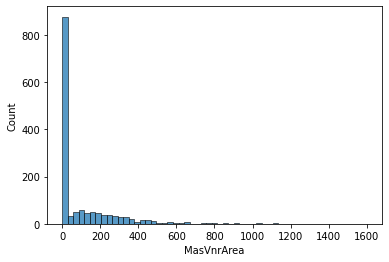

In [46]:
sns.histplot(data['MasVnrArea'])

In [47]:
data['MasVnrArea'].fillna(0,inplace=True)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

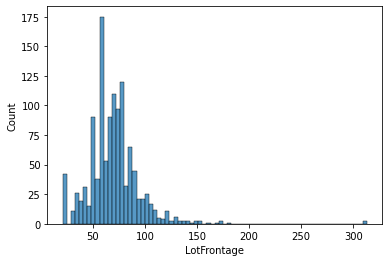

In [48]:
sns.histplot(data['LotFrontage'])

In [49]:
print(data['LotFrontage'].mean())
print(data['LotFrontage'].median())
print(data['LotFrontage'].mode())

70.04995836802665
69.0
0    60.0
dtype: float64


In [50]:
data.fillna(data['LotFrontage'].median(),inplace=True)

In [51]:
missing = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns = ["Number of missing values"])
missing.head(10)


,Number of missing values
LotFrontage,0
LotArea,0
DateSold,0
RemodAge,0
Age,0
SalePrice,0
WoodDeckSF,0
GarageCars,0
GarageFinish,0
GarageType,0
